In [1]:
# Requests for handling HTTP get and other requests
import requests
import time # import for playing nice and not getting blocked
import pandas as pd
# from BeautifulSoup4 import BeatifulSoup if installed through pip install BeautifulSoup4
# 
from bs4 import BeautifulSoup

In [ ]:
# if bs4 not found install it with
#  !pip install beatifulsoup4
# https://www.crummy.com/software/BeautifulSoup/

In [ ]:
!dir
# ar ! i can run command line commands

In [2]:
# centrs = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
# url = "https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/"
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"

In [3]:
req = requests.get(url) # so here we make a call to webpage via HTTP GET request and get something back
req.status_code # we could add if to check for 200

200

In [4]:
req.text[:200]

'<!DOCTYPE html>\r\n<HTML><HEAD>\r\n<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>\r\n<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">\r\n<meta name="viewport" c'

In [5]:
req.text.count("Stabu")  # we could parse it ourselves but why bother when we have libraries ?

2

In [6]:
req.text.index("Stabu")

16051

In [ ]:
type(req)

In [ ]:
# req.json() will not work since this page is not JSON!

In [7]:
req.text[req.text.index("Stabu"):req.text.index("Stabu")+100] # we could do parsing by hand but usually we want to use a premade parser

'Stabu</option><option value="5312">Strēlnieku</option><option value="5353">Tallinas</option><option '

In [8]:
# parser means structuring your text into some structure
soup = BeautifulSoup(req.text, 'lxml') # lxml is improved parser, a little bit more lenient
# soup = BeautifulSoup(req.text) # could use Python's built in HTML parser
soup.title

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>

In [10]:
type(soup)

bs4.BeautifulSoup

In [11]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
tables = soup.find_all("table") # finds ALL elements matching our filter
len(tables) 

7

In [12]:
# find finds just one match - first that matches
# tr table row - https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tr
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [13]:
type(headline)

bs4.element.Tag

In [14]:
headline.text  # i could use split here but we can go deeper!

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [15]:
headline.text.split()

['Sludinājumi', 'datums', 'IelaIst.m2StāvsSērijaCena,', 'm2Cena']

In [16]:
headtds = headline.find_all("td")  # get list of all td tags inside our headline tag only(not the whole document!)
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Sludinājumi
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title="

In [17]:
len(headtds) # so we have 8 table data elements

8

In [13]:
headline.text # this returns ALL text in headline and its children and grandchildren

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [18]:
headtds[0].text # we do not need the first one

'\n\xa0Sludinājumi\r\n\n\n\ndatums\n'

In [19]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']

In [20]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns  # merge both lists, could use extend
    return column_list

In [21]:
column_names = getColList(soup)
column_names # to be used later when creating our table

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [22]:
trows = soup.find_all('tr') # tr stands for table row
len(trows)


40

In [ ]:
# if i had no other choices I could find starting and end index by hand and hard code it
# but that is liable to change between pages

In [22]:
trows[9] # we coudl do it by hand

<tr id="tr_49981550"><td class="msga2 pp0"><input id="c49981550" name="mid[]" type="checkbox" value="49981550_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/cijbo.html" id="im49981550"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/896/223801/44760022.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTk1JTdFJThFJUEwJTlDJUEwJTlDJUNBJThBJUE1JTk2JUEzJTlCJTg1JTkyJUEyJTk1JUE2JTlEJTgwJTkxJUE4JTkzJTlG|dNYpcm" href="/msg/lv/real-estate/flats/riga/centre/cijbo.html" id="dm_49981550">Pašā Rīgas centrā pārdod plašu dzīvokli. 
-Dzīvoklis atrodas pa</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Blaumaņa 27</td><td c="1" class="msga2-o pp6" nowrap="">5</td><td c="1" class="msga2-o pp6" nowrap="">132</td><td c="1" class="msga2-o pp6" nowrap="">1/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">1,200 €</td><td c="1" class="msga2-o pp6" nowrap="">158,400  €</td></tr>

In [23]:
trows[5] # so could take trows[6:35] downside is that this is fixed with magic numbers

<tr id="tr_51246825"><td class="msga2 pp0"><input id="c51246825" name="mid[]" type="checkbox" value="51246825_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTkyJUFCJThCJTg1anclQTglRERnJTlFJTk0JUFGJTg3JThBbCU3QyVBRiU5OWYlOUIlOTMlQUElODklODRodg==|azTT8Fxa6h" href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="dm_51246825">Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Skolas 14</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">169</td><td c="1" class="msga2-o pp6" nowrap="">6/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,953 €</td><td c="1" class="msga2-o pp6" nowrap="">330,000  €</td></tr>

In [24]:
trows[9]["id"], trows[5].get("id") # get is safer since not all elements have ids

('tr_51513927', 'tr_51246825')

In [25]:
# hardest part in this 
# how to filter only specific rows
# we need to find something that is unique to our apartment rows but not to the extra rows
# remember we id is not guaranteed, so "" gives us default value when there is no id
apt_rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
len(apt_rows)

30

In [26]:
apt_rows[-1]

<tr id="tr_51447061"><td class="msga2 pp0"><input id="c51447061" name="mid[]" type="checkbox" value="51447061_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/aehjp.html" id="im51447061"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/920/229894/45978602.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JUEyJTk1JTk4JUEyJUE0JUNFYmolQTElOTQlOUMlQTUlQUIlODRiaSVBNiU5NSU5QyVBMSVBOSU4NQ==|pcfmrR15" href="/msg/lv/real-estate/flats/riga/centre/aehjp.html" id="dm_51447061">Pārdod 2 istabu dzīvokli ar ļoti labu atrašanās vietu Rīgas cent</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Kurbada 1</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">54</td><td c="1" class="msga2-o pp6" nowrap="">2/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">1,500 €</td><td c="1" class="msga2-o pp6" nowrap="">81,000  €</td></tr>

In [27]:
apt_rows[0]

<tr id="tr_51246825"><td class="msga2 pp0"><input id="c51246825" name="mid[]" type="checkbox" value="51246825_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTkyJUFCJThCJTg1anclQTglRERnJTlFJTk0JUFGJTg3JThBbCU3QyVBRiU5OWYlOUIlOTMlQUElODklODRodg==|azTT8Fxa6h" href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="dm_51246825">Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Skolas 14</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">169</td><td c="1" class="msga2-o pp6" nowrap="">6/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,953 €</td><td c="1" class="msga2-o pp6" nowrap="">330,000  €</td></tr>

In [28]:
# lets make a function from the above doodle and make it work on most pages on SS
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [29]:
apt_rows = getRowList(soup)
len(apt_rows)

30

In [30]:
first_ad = apt_rows[0]
first_ad

<tr id="tr_51246825"><td class="msga2 pp0"><input id="c51246825" name="mid[]" type="checkbox" value="51246825_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTkyJUFCJThCJTg1anclQTglRERnJTlFJTk0JUFGJTg3JThBbCU3QyVBRiU5OWYlOUIlOTMlQUElODklODRodg==|azTT8Fxa6h" href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="dm_51246825">Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Skolas 14</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">169</td><td c="1" class="msga2-o pp6" nowrap="">6/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,953 €</td><td c="1" class="msga2-o pp6" nowrap="">330,000  €</td></tr>

In [31]:
row_tds = first_ad.find_all('td') # get all table data elements from first ad/row
len(row_tds)

10

In [32]:
row_tds

[<td class="msga2 pp0"><input id="c51246825" name="mid[]" type="checkbox" value="51246825_1106_0"/></td>,
 <td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a></td>,
 <td class="msg2"><div class="d1"><a class="am" data="JTkyJUFCJThCJTg1anclQTglRERnJTlFJTk0JUFGJTg3JThBbCU3QyVBRiU5OWYlOUIlOTMlQUElODklODRodg==|azTT8Fxa6h" href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="dm_51246825">Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c</a></div></td>,
 <td c="1" class="msga2-o pp6" nowrap="">Skolas 14</td>,
 <td c="1" class="msga2-o pp6" nowrap="">4</td>,
 <td c="1" class="msga2-o pp6" nowrap="">169</td>,
 <td c="1" class="msga2-o pp6" nowrap="">6/6</td>,
 <td c="1" class="msga2-o pp6" nowrap="">Renov.</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1,953 €</td>,
 <td c="1" class="msga2-o pp6" nowrap="">330,000  €</td>]

In [33]:
row_tds[0].text

''

In [34]:
row_tds[1].text

''

In [35]:
row_tds[1].attrs # we can see elements attributes

{'class': ['msga2']}

In [36]:
img = row_tds[1].find("img")
img

<img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/>

In [37]:
img.get("src")

'https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg'

In [38]:
a = row_tds[1].find('a') # a tag is called anchor tag
a

<a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a>

In [39]:
a.attrs

{'href': '/msg/lv/real-estate/flats/riga/centre/fdebl.html',
 'id': 'im51246825'}

In [40]:
a.get('href'), a['href']

('/msg/lv/real-estate/flats/riga/centre/fdebl.html',
 '/msg/lv/real-estate/flats/riga/centre/fdebl.html')

In [41]:
prefix = "https://www.ss.com"
prefix + a.get('href')

'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/fdebl.html'

In [42]:
row_tds[2].text # 3rd element has the description

'Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c'

In [43]:
row_tds[-1].text # last element has the price

'330,000  €'

In [44]:
column_names # we got these first

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [45]:
# from row get dictionary with values 
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    # we start with description
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    # then url
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [46]:
apt_rows[0] # first row of ads

<tr id="tr_51246825"><td class="msga2 pp0"><input id="c51246825" name="mid[]" type="checkbox" value="51246825_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="im51246825"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/914/228430/45685976.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTkyJUFCJThCJTg1anclQTglRERnJTlFJTk0JUFGJTg3JThBbCU3QyVBRiU5OWYlOUIlOTMlQUElODklODRodg==|azTT8Fxa6h" href="/msg/lv/real-estate/flats/riga/centre/fdebl.html" id="dm_51246825">Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Skolas 14</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">169</td><td c="1" class="msga2-o pp6" nowrap="">6/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,953 €</td><td c="1" class="msga2-o pp6" nowrap="">330,000  €</td></tr>

In [47]:
getRow(apt_rows[0])

{'description': 'Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/fdebl.html',
 'Iela': 'Skolas 14',
 'Ist.': '4',
 'm2': '169',
 'Stāvs': '6/6',
 'Sērija': 'Renov.',
 'Cena, m2': '1,953 €',
 'Cena': '330,000  €'}

In [48]:
getRow(first_ad)

{'description': 'Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/fdebl.html',
 'Iela': 'Skolas 14',
 'Ist.': '4',
 'm2': '169',
 'Stāvs': '6/6',
 'Sērija': 'Renov.',
 'Cena, m2': '1,953 €',
 'Cena': '330,000  €'}

In [50]:
# so if we know how to work on single row then we can do process multiple rows
def getRows(rowlist, colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist] # so return a list of dictionaries


In [51]:
row_ads = getRows(apt_rows)
row_ads[-3:] # last 3 ads

[{'description': 'Īpašnieks pārdod divistabu dzīvokli. Var uztaisīt par mini trisi',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/hdoon.html',
  'Iela': 'Cēsu 41',
  'Ist.': '2',
  'm2': '33',
  'Stāvs': '2/2',
  'Sērija': 'P. kara',
  'Cena, m2': '689 €',
  'Cena': '22,750  €'},
 {'description': 'Īpašnieks pārdod dzīvokli lieliskā atrašanās vietā ar ļoti zemie',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/abiie.html',
  'Iela': 'Mēness 14',
  'Ist.': '3',
  'm2': '62',
  'Stāvs': '3/3',
  'Sērija': 'P. kara',
  'Cena, m2': '968 €',
  'Cena': '60,000  €'},
 {'description': 'Pārdod 2 istabu dzīvokli ar ļoti labu atrašanās vietu Rīgas cent',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/aehjp.html',
  'Iela': 'Kurbada 1',
  'Ist.': '2',
  'm2': '54',
  'Stāvs': '2/5',
  'Sērija': 'P. kara',
  'Cena, m2': '1,500 €',
  'Cena': '81,000  €'}]

In [52]:
type(row_ads)  # list of dictionaries for each ad

list

In [ ]:
# such a list of dictionaries is easy to convert into a DataFrame in pandas

In [53]:
dtemp = pd.DataFrame(row_ads, columns=column_names)
dtemp.shape

(30, 9)

In [54]:
dtemp.head()

description  \
0  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
1  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
2  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
3  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   
4  Ērts dzīvošanai un darbam trīsistabu dzīvoklis...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...    Valdemāra 106    3   

    m2 Stāvs   Sērija Cena, m2        Cena  
0  169   6/6   Renov.  1,953 €  330,000  €  
1  141   6/6    Jaun.  2,376 €  335,000  €  
2   42   1/6   Renov.  1,857 €   78,000  €  
3  173   3/6  P. kara  1,179 €  204,000  €  
4   72   1/5  Staļina  1,400 €  100,800  €

In [55]:
dtemp.to_excel("rigas_rajons30.xlsx")

In [56]:
# so with this function I can get full dataframe from a single page on ss.com not only apartments
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)
    

In [57]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [58]:
imanta = "https://www.ss.com/lv/real-estate/flats/riga/imanta/sell/"
idf = getDFfromURL(imanta)
idf.head()

description  \
0  Pārdodu mājīgu 2-istabu dzīvokli 602. sērijas:...   
1  Jauks, ērts divistabu dzīvoklis Imantā ar balk...   
2  Zaļš pagalms, lieliski ģimenēm ar bērniem un d...   
3  Pārdod remontējamu divistabu dzīvokli 602. sēr...   
4  Продаём квартиру на Курземес проспекте 138, 5-...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/i...        Slokas 183    2   
1  https://ss.com/msg/lv/real-estate/flats/riga/i...         Dammes 36    2   
2  https://ss.com/msg/lv/real-estate/flats/riga/i...   Kurzemes pr. 42    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/i...        Zentenes 3    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/i...  Kurzemes pr. 138    3   

   m2 Stāvs    Sērija Cena, m2       Cena  
0  49   3/9      602.  1,265 €  62,000  €  
1  50   2/9      602.  1,460 €  73,000  €  
2  39   4/5  LT proj.  1,102 €  42,980  €  
3  52   9/9      602.  1,058 €  55,000  €  
4  62   5/9      602.  1,316 €  81,600  €

In [50]:
df = getDFfromURL(centrs) # this will involve calling web page

In [55]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [53]:
df = getDFfromURL(url)
df.shape

(30, 9)

In [51]:
df.shape

(30, 9)

In [57]:
df.head()

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   

    m2 Stāvi Zem. pl.        Cena  
0  480     3  1928 m²  250,000  €  
1  210     2  1000 m²  160,000  €  
2  203     2   750 m²  135,000  €  
3   85     2   580 m²   46,800  €  
4  278     2  1200 m²  265,000  €

In [59]:

# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
anchors = soup.find_all("a")
len(anchors) # anchors are popular in pages

99

In [59]:
anchors[:5]

[<a href="/" title="Sludinājumi"><img alt="Sludinājumi" border="0" class="page_header_logo" src="https://i.ss.com/img/p.gif"/></a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/new/" title="Iesniegt Sludinājumu">Iesniegt Sludinājumu</a>,
 <a class="a_menu" href="/lv/login/" title="Mani Sludinājumi">Mani Sludinājumi</a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/riga-region/search/" title="Meklēt sludinājumus">Meklēšana</a>,
 <a class="a_menu" href="/lv/favorites/" title="Memo">Memo</a>]

In [60]:
navs = [anchor for anchor in anchors if anchor.get("name") == "nav_id"] # get will get us None if no "name" exists
len(navs)

10

In [61]:
navs

[<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page24.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page2.html" name="nav_id" rel="next">2</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page3.html" name="nav_id" rel="next">3</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page4.html" name="nav_id" rel="next">4</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page5.html" name="nav_id" rel="next">5</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page6.html" name="nav_id" rel="next">6</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page7.html" name="nav_id" rel="next">7</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page8.html" name="nav_id" rel="next">8</a>,
 <a class="navi" href="/lv/real-est

In [62]:
navs[0]

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page24.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [63]:
navs[0].attrs

{'name': 'nav_id',
 'rel': ['prev'],
 'class': ['navi'],
 'href': '/lv/real-estate/flats/riga/centre/sell/page24.html'}

In [64]:
navs[0]['href']

'/lv/real-estate/flats/riga/centre/sell/page24.html'

In [65]:
# could use regular expression here but we can use split 
afterpage = navs[0]['href'].split("/page")[-1] # -1 might be safer than 1 in case there is region with name page
afterpage

'24.html'

In [66]:
beforedot = afterpage.split(".html")[0]
beforedot

'24'

In [67]:
lastpage = int(beforedot)
lastpage

24

In [ ]:
# so now we put everything we just did in a single function

In [68]:
def getAllLocalUrls(url):
    """Get a list of all urls including paginated pages"""
    results = [url] # default is just the url if no extra pages found, teiksim Bolderājai...
    req = requests.get(url)
    if req.status_code != 200:
        print(f"Bad response! {req.status_code}")
        return []
    soup = BeautifulSoup(req.text, 'lxml')
    # we just need a one element
    prevanchor = soup.find('a', {"rel":"prev"}) # find finds first match only
    if prevanchor == None: # means there is only one page of ads
        return results
    href = prevanchor.attrs.get('href')
    lastPageNum = int(href.split('/page')[-1].split('.html')[0])
    print("Last page is",lastPageNum)
    nurls = [f"{url}page{n}.html" for n in range(2,lastPageNum+1)]
    results += nurls
    return results

In [69]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [70]:
centrs = url

In [71]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [72]:
local_urls = getAllLocalUrls(url)
len(local_urls),local_urls[:3],local_urls[-1]

Last page is 24


(24,
 ['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html'],
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page24.html')

In [73]:
local_urls

['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page12.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page13.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page14.html

In [74]:
dlast = getDFfromURL(local_urls[-1])
dlast.shape

(25, 9)

In [75]:
dlast

description  \
0   Elegants 3 istabu dzīvoklis ar balkonu otrajā ...   
1   Pārdošanā 3 istabu dzīvoklis jaunajā projektā ...   
2   Pārdod vienas guļamistabas dzīvokli ar atseviš...   
3   Investīcijas objekts\r\nPārdod vienistabas dzī...   
4   Ekskluzīvs 4-istabu dzīvoklis vēstniecību rajo...   
5   Продаётся 4-комнатная квартира в новостройке. ...   
6   Skaists dzīvoklis ar erkeri, tikko pēc kapitāl...   
7   Gaumīgi izremontēts 4-istabu dzīvoklis Klusajā...   
8   Pārdod gaišu divu istabu dzīvokli ar stāvvietu...   
9   Pārdodam 3-istabu dzīvokli pašā Rīgas centrā, ...   
10  Mājīgs, silts un kluss trīs istabu dzīvoklis p...   
11  3D tūres links pievienots zemāk - izstaigā dzī...   
12  Pārdod trīsistabas dzīvokli. Divas izolētas is...   
13  Pārdod 1 istabas dzīvokli Rīgas centrā renovēt...   
14  Ērts plānojums četru istabu iekšpagalma dzīvok...   
15  Ērts plānojums četru istabu iekšpagalma dzīvok...   
16  Dzīvoklis mājā, kas atrodās klusā pagalmā Brīv...   
17  Īpašums ar ērtībām un atsevišķu ieeju no slēgt...   
18  Silts dzīvoklis. Ļoti laba lokācija. Pilna apd...   
19  Последняя квартира. Парковка входит в стоимост...   
20  Prestižs dzīvoklis klusajā centrā - vēstniecīb...   
21  Labs investīciju projekts - var sadalīt 2 dzīv...   
22  Pārdodu gaišu dzīvokli, mūra mājā, 5.stāvā, sl...   
23  Двухэтажная квартира (также возможна аренда ил...   
24  Ekskluzīvs dzīvoklis Rīgas centrā- mājā, kuru ...   

                                                  url              Iela Ist.  \
0   https://ss.com/msg/lv/real-estate/flats/riga/c...        Lāčplēša 7    3   
1   https://ss.com/msg/lv/real-estate/flats/riga/c...     Antonijas 16A    3   
2   https://ss.com/msg/lv/real-estate/flats/riga/c...   Bruņinieku 121B    1   
3   https://ss.com/msg/lv/real-estate/flats/riga/c...      Tallinas 90A    1   
4   https://ss.com/msg/lv/real-estate/flats/riga/c...  Kalpaka bulv. 10    4   
5   https://ss.com/msg/lv/real-estate/flats/riga/c...        Alauksta 9    4   
6   https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 103    2   
7   https://ss.com/msg/lv/real-estate/flats/riga/c...        Eksporta 2    4   
8   https://ss.com/msg/lv/real-estate/flats/riga/c...       Visvalža 3B    2   
9   https://ss.com/msg/lv/real-estate/flats/riga/c...         Merķeļa 6    3   
10  https://ss.com/msg/lv/real-estate/flats/riga/c...     Bruņinieku 28    3   
11  https://ss.com/msg/lv/real-estate/flats/riga/c...    Artilērijas 26    2   
12  https://ss.com/msg/lv/real-estate/flats/riga/c...      Pētersalas 7    3   
13  https://ss.com/msg/lv/real-estate/flats/riga/c...   Bruņinieku 121B    1   
14  https://ss.com/msg/lv/real-estate/flats/riga/c...   Valdemāra 57/59    4   
15  https://ss.com/msg/lv/real-estate/flats/riga/c...   Valdemāra 57/59    4   
16  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 156    3   
17  https://ss.com/msg/lv/real-estate/flats/riga/c...         Elijas 20    1   
18  https://ss.com/msg/lv/real-estate/flats/riga/c...         Stabu 116    4   
19  https://ss.com/msg/lv/real-estate/flats/riga/c...      Valdemāra 37    3   
20  https://ss.com/msg/lv/real-estate/flats/riga/c...         Ausekļa 5    5   
21  https://ss.com/msg/lv/real-estate/flats/riga/c...          Stabu 47    5   
22  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 134    2   
23  https://ss.com/msg/lv/real-estate/flats/riga/c...       Maskavas 29    5   
24  https://ss.com/msg/lv/real-estate/flats/riga/c...        Tērbatas 4    2   

     m2 Stāvs    Sērija Cena, m2        Cena  
0    82   2/6    Renov.  3,280 €  269,000  €  
1   114   3/7     Jaun.  2,939 €  335,000  €  
2    35   5/5    Renov.  1,900 €   66,500  €  
3    33   4/5    Renov.  2,121 €   70,000  €  
4   123   3/5   P. kara  2,602 €  320,000  €  
5   136   6/6     Jaun.  1,912 €  260,000  €  
6    45   3/6   P. kara  2,400 €  108,000  €  
7   100   2/5   Staļina  1,999 €  199,900  €  
8    51   2/5   P. kara  1,371 €   69,900  €  
9   102 

In [76]:
def get_all_ads_df(start_url, save_excel_path=None):
    df_list=[] # so we will save our dataframes in a list
    local_urls = getAllLocalUrls(start_url)
    for url in local_urls:
        print(f"Gathering data from {url}")
        df_list.append(getDFfromURL(url))
        time.sleep(0.3) # we need this to play nice! to avoid rate limit or IP ban!!
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    big_df = pd.concat(df_list, ignore_index=True) # then make a big dataframe from all the small dataframes
    if save_excel_path:
        big_df.to_excel(save_excel_path)
    return big_df
    

In [77]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [78]:
centra_df = get_all_ads_df(centrs, save_excel_path="centrs_dzivokli_maijs13.xlsx")

Last page is 24
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [79]:
centra_df.head(10)

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   
5  Ērts dzīvošanai un darbam trīsistabu dzīvoklis...   
6  Pārdodu plašu 3 istabu dzīvokli Rīgas centrā -...   
7  Pārdodu skaistu, pārdomāti un kvalitatīvi remo...   
8  Оriģināls divu līmeņu dzīvoklis, kluss, silts ...   
9  Tiek pārdots 3 istabu studiotipa dzīvoklis, pi...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   
5  https://ss.com/msg/lv/real-estate/flats/riga/c...    Valdemāra 106    3   
6  https://ss.com/msg/lv/real-estate/flats/riga/c...     Brīvības 162    3   
7  https://ss.com/msg/lv/real-estate/flats/riga/c...     Brīvības 39A    3   
8  https://ss.com/msg/lv/real-estate/flats/riga/c...          Čaka 44    2   
9  https://ss.com/msg/lv/real-estate/flats/riga/c...     Brīvības 133    3   

    m2 Stāvs   Sērija Cena, m2        Cena  
0  120   3/5  P. kara  2,417 €  290,000  €  
1  169   6/6   Renov.  1,953 €  330,000  €  
2  141   6/6    Jaun.  2,376 €  335,000  €  
3   42   1/6   Renov.  1,857 €   78,000  €  
4  173   3/6  P. kara  1,179 €  204,000  €  
5   72   1/5  Staļina  1,400 €  100,800  €  
6  122   6/6   Renov.  1,516 €  185,000  €  
7  105   5/6   Renov.  2,381 €  250,000  €  
8   97   2/5  P. kara  1,103 €  107,000  €  
9   53   3/4  P. kara  1,660 €   88,000  €

In [72]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [74]:
riga_region = get_all_ads_df(url, "riga_region_sep28.xlsx")

Last page is 17
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page9.html
Gath

In [75]:
riga_region.shape

(506, 7)

In [76]:
riga_region.head(10)

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   
5  Дом у озера в Букулты на продажу\r\n\r\nПланир...   
6  Дом в Суниши. \r\nНаходится в частной, закрыто...   
7  Brīnišķīgs īpašums, pašā Mārupes sirdī, grezna...   
8  Tiek pārdota kapitāli un rūpīgi būvēta privātm...   
9  Mājīgs īpašums Dreiliņos - rindu mājā, kas noz...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   
5  https://ss.com/msg/lv/real-estate/homes-summer...   Garkalnes nov.Bukulti   
6  https://ss.com/msg/lv/real-estate/homes-summer...    Garkalnes nov.Sunīši   
7  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
8  https://ss.com/msg/lv/real-estate/homes-summer...      Babītes pag.Spilve   
9  https://ss.com/msg/lv/real-estate/homes-summer...    Stopiņu nov.Dreiliņi   

    m2 Stāvi Zem. pl.        Cena  
0  480     3  1928 m²  250,000  €  
1  210     2  1000 m²  160,000  €  
2  203     2   750 m²  135,000  €  
3   85     2   580 m²   46,800  €  
4  278     2  1200 m²  265,000  €  
5  590     3  1900 m²  349,000  €  
6  192     2  1346 m²  315,000  €  
7  226     2  1352 m²  490,000  €  
8  199     1  1573 m²  300,000  €  
9  221     2   626 m²  230,000  €

In [77]:
riga_region.tail(10)

description  \
16  Продается двухэтажный кирпичный дом с ухоженны...   
17  Pārdodu kvalitatīvu, skaistu un ļoti siltu māj...   
18  Продается новостройка в стадии строительства -...   
19  Pārdošanā mājīgs īpašums privātmāju ciematā "P...   
20  Pārdod mūsdienīgu energoefektīvu privātmāju ar...   
21  Lat: Laba vasarnīca labā vietā, netālu no Rīga...   
22  Расположен в 10 км от Юрмалы, 7 км от аэропорт...   
23  Īpašnieks pārdod privātmāju ar kopējo platību ...   
24  Pārdod zemi ar mājiņu, kurā ir ievikts ūdens, ...   
25  Dzīvojamā māja ar baseinu un savu dīķi klusā v...   

                                                  url  \
16  https://ss.com/msg/lv/real-estate/homes-summer...   
17  https://ss.com/msg/lv/real-estate/homes-summer...   
18  https://ss.com/msg/lv/real-estate/homes-summer...   
19  https://ss.com/msg/lv/real-estate/homes-summer...   
20  https://ss.com/msg/lv/real-estate/homes-summer...   
21  https://ss.com/msg/lv/real-estate/homes-summer...   
22  https://ss.com/msg/lv/real-estate/homes-summer...   
23  https://ss.com/msg/lv/real-estate/homes-summer...   
24  https://ss.com/msg/lv/real-estate/homes-summer...   
25  https://ss.com/msg/lv/real-estate/homes-summer...   

                    Pagasts   m2 Stāvi  Zem. pl.        Cena  
16     Inčukalna nov.Egļupe  112     2    643 m²   36,000  €  
17   Olaines pag.Jaunolaine  240     2    900 m²  239,000  €  
18  Salaspils l. t.Piķurgas   78     1   1200 m²   78,000  €  
19  Garkalnes nov.Upesciems  153     1   1045 m²  261,700  €  
20     Stopiņu nov.Vālodzes  235     2   1000 m²  390,000  €  
21  Saulkrastu l. t.Priedes  100     2    600 m²   28,000  €  
22       Babītes pag.Liberi  520     4   1861 m²  440,000  €  
23   Salaspils l. t.Pikalne   99     1    352 m²   77,000  €  
24     Inčukalna nov.Egļupe   25     1  16000 m²   35,000  €  
25  Carnikavas nov.Kalngale  494     3   2400 m²  290,000  €

In [73]:
agens = "https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/"
df = get_all_ads_df(agens, "agens_27_09.xlsx")
df.head()

Last page is 3
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page3.html


description  \
0  In a prestigious new building, with an excelle...   
1  Pārdod divistabu dzīvokli Āgenskalnā. Pie māja...   
2  Pārdod vienistabas dzīvokli Āgenskalnā, pretīm...   
3  Steidzami tiek pārdots 2-istabas dzīvoklis. \r...   
4  Pārdod jauku un mājīgu 2 istabu dzīvokli Āgens...   

                                                 url          Iela Ist.  m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/a...  Kalnciema 9a    3  84   
1  https://ss.com/msg/lv/real-estate/flats/riga/a...  Raņķa d. 7/3    2  42   
2  https://ss.com/msg/lv/real-estate/flats/riga/a...  Ventspils 25    1  24   
3  https://ss.com/msg/lv/real-estate/flats/riga/a...       Auces 3    2  47   
4  https://ss.com/msg/lv/real-estate/flats/riga/a...  Ventspils 13    2  50   

  Stāvs   Sērija Cena, m2        Cena  
0  4/10    Jaun.  2,101 €  176,500  €  
1   1/5   Hrušč.  1,512 €   63,500  €  
2   2/2  P. kara    496 €   11,900  €  
3   3/3  P. kara  2,085 €   98,000  €  
4   1/5  P. kara    800 €   40,000  €

In [80]:
centra_df.shape

(715, 9)

In [81]:
df = centra_df  # alias
df.shape

(715, 9)

In [82]:
df.shape

(715, 9)

In [83]:
df.columns

Index(['description', 'url', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija',
       'Cena, m2', 'Cena'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  715 non-null    object
 1   url          715 non-null    object
 2   Iela         715 non-null    object
 3   Ist.         715 non-null    object
 4   m2           715 non-null    object
 5   Stāvs        715 non-null    object
 6   Sērija       715 non-null    object
 7   Cena, m2     715 non-null    object
 8   Cena         715 non-null    object
dtypes: object(9)
memory usage: 50.4+ KB


In [75]:
df = get_all_ads_df(centrs, "centrs_27_09.xlsx")

Last page is 21
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [67]:
df = centra_df

In [68]:
df.shape

(596, 9)

In [85]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena  
0  120   3/5  P. kara  2,417 €  290,000  €  
1  169   6/6   Renov.  1,953 €  330,000  €  
2  141   6/6    Jaun.  2,376 €  335,000  €  
3   42   1/6   Renov.  1,857 €   78,000  €  
4  173   3/6  P. kara  1,179 €  204,000  €

In [78]:
df.tail()

description  \
25  Супер предложение Продает хозяин самая дешёвая...   
26  Tiek pārdots 3 - istabu dzīvoklis renovētā māj...   
27  Pārdod gaišu studijas tipa vienistabas dzīvokl...   
28  Продается светлая, солнечная 3 комнатная кварт...   
29  Pārdodu nevis stūra, sausu un siltu 2 istabu d...   

                                                  url            Iela Ist.  \
25  https://ss.com/msg/lv/real-estate/flats/riga/c...       Ausekļa 5    5   
26  https://ss.com/msg/lv/real-estate/flats/riga/c...   Elizabetes 22    3   
27  https://ss.com/msg/lv/real-estate/flats/riga/c...       Vagonu 24    1   
28  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 93    3   
29  https://ss.com/msg/lv/real-estate/flats/riga/c...  Lāčplēša 62/66    2   

     m2 Stāvs   Sērija Cena, m2        Cena  
25  162   2/6   Renov.  2,222 €  360,000  €  
26   72   4/6   Renov.  2,486 €  179,000  €  
27   29   2/2  P. kara    931 €   27,000  €  
28   65   5/7    Jaun.  2,262 €  147,000  €  
29   50   3/5  P. kara  1,220 €   60,980  €

In [ ]:
df.shape

In [86]:
#we can do more post processing - feature engineering using existing columns
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor  
0  120   3/5  P. kara  2,417 €  290,000  €     3        5  
1  169   6/6   Renov.  1,953 €  330,000  €     6        6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6        6  
3   42   1/6   Renov.  1,857 €   78,000  €     1        6  
4  173   3/6  P. kara  1,179 €  204,000  €     3        6

In [78]:
df = riga_region # just a shortcut

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 2
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  693 non-null    object
 1   url          693 non-null    object
 2   Iela         693 non-null    object
 3   Ist.         693 non-null    object
 4   m2           693 non-null    object
 5   Stāvs        693 non-null    object
 6   Sērija       693 non-null    object
 7   Cena, m2     693 non-null    object
 8   Cena         693 non-null    object
 9   Floor        693 non-null    object
 10  MaxFloor     693 non-null    object
dtypes: object(11)
memory usage: 65.0+ KB


In [87]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor  
0  120   3/5  P. kara  2,417 €  290,000  €     3        5  
1  169   6/6   Renov.  1,953 €  330,000  €     6        6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6        6  
3   42   1/6   Renov.  1,857 €   78,000  €     1        6  
4  173   3/6  P. kara  1,179 €  204,000  €     3        6

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  715 non-null    object
 1   url          715 non-null    object
 2   Iela         715 non-null    object
 3   Ist.         715 non-null    object
 4   m2           715 non-null    object
 5   Stāvs        715 non-null    object
 6   Sērija       715 non-null    object
 7   Cena, m2     715 non-null    object
 8   Cena         715 non-null    object
 9   Floor        715 non-null    object
 10  MaxFloor     715 non-null    object
dtypes: object(11)
memory usage: 61.6+ KB


In [89]:
df["price"] = df.Cena.str.split(' ').str[0]  # create a new column from price
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor    price  
0  120   3/5  P. kara  2,417 €  290,000  €     3        5  290,000  
1  169   6/6   Renov.  1,953 €  330,000  €     6        6  330,000  
2  141   6/6    Jaun.  2,376 €  335,000  €     6        6  335,000  
3   42   1/6   Renov.  1,857 €   78,000  €     1        6   78,000  
4  173   3/6  P. kara  1,179 €  204,000  €     3        6  204,000

In [90]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer int64 for larger
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor   price  
0  120   3/5  P. kara  2,417 €  290,000  €     3        5  290000  
1  169   6/6   Renov.  1,953 €  330,000  €     6        6  330000  
2  141   6/6    Jaun.  2,376 €  335,000  €     6        6  335000  
3   42   1/6   Renov.  1,857 €   78,000  €     1        6   78000  
4  173   3/6  P. kara  1,179 €  204,000  €     3        6  204000

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  715 non-null    object
 1   url          715 non-null    object
 2   Iela         715 non-null    object
 3   Ist.         715 non-null    object
 4   m2           715 non-null    object
 5   Stāvs        715 non-null    object
 6   Sērija       715 non-null    object
 7   Cena, m2     715 non-null    object
 8   Cena         715 non-null    object
 9   Floor        715 non-null    object
 10  MaxFloor     715 non-null    object
 11  price        715 non-null    int32 
dtypes: int32(1), object(11)
memory usage: 64.4+ KB


In [92]:
df["floor"] = df.Floor.astype('int32')

In [93]:
df.m2 = df.m2.astype('int32')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  715 non-null    object
 1   url          715 non-null    object
 2   Iela         715 non-null    object
 3   Ist.         715 non-null    object
 4   m2           715 non-null    int32 
 5   Stāvs        715 non-null    object
 6   Sērija       715 non-null    object
 7   Cena, m2     715 non-null    object
 8   Cena         715 non-null    object
 9   Floor        715 non-null    object
 10  MaxFloor     715 non-null    object
 11  price        715 non-null    int32 
 12  floor        715 non-null    int32 
dtypes: int32(3), object(10)
memory usage: 64.4+ KB


In [95]:
df.MaxFloor = df.MaxFloor.astype('int32')
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0  120   3/5  P. kara  2,417 €  290,000  €     3         5  290000      3  
1  169   6/6   Renov.  1,953 €  330,000  €     6         6  330000      6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6         6  335000      6  
3   42   1/6   Renov.  1,857 €   78,000  €     1         6   78000      1  
4  173   3/6  P. kara  1,179 €  204,000  €     3         6  204000      3

In [96]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0  120   3/5  P. kara  2,417 €  290,000  €     3         5  290000      3  
1  169   6/6   Renov.  1,953 €  330,000  €     6         6  330000      6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6         6  335000      6  
3   42   1/6   Renov.  1,857 €   78,000  €     1         6   78000      1  
4  173   3/6  P. kara  1,179 €  204,000  €     3         6  204000      3

In [97]:
sorted_df = df.sort_values(by="price",ascending=False)
sorted_df.head()

description  \
645  Ekskluzīvs dzīvoklis vienā no nozīmīgākajiem a...   
481  Piedāvājam iegādei plašu un mūsdienīgu 4-istab...   
221  Arhitektonisko šedevru un dzīves kvalitātes ba...   
550  Piedāvājam iegādāties plašu, gaišu un izsmalci...   
546  Pārdod gaišu un plašu piecu istabu mansarda dz...   

                                                   url           Iela Ist.  \
645  https://ss.com/msg/lv/real-estate/flats/riga/c...   Elizabetes 3    6   
481  https://ss.com/msg/lv/real-estate/flats/riga/c...    Lāčplēša 11    4   
221  https://ss.com/msg/lv/real-estate/flats/riga/c...    Lāčplēša 11    4   
550  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ausekļa 5    5   
546  https://ss.com/msg/lv/real-estate/flats/riga/c...  Elizabetes 12    5   

      m2 Stāvs   Sērija  Cena, m2          Cena Floor  MaxFloor    price  \
645  145   2/5   Renov.  10,172 €  1,475,000  €     2         5  1475000   
481  197   6/7    Jaun.   4,076 €    802,880  €     6         7   802880   
221  197   6/7    Jaun.   4,076 €    802,880  €     6         7   802880   
550  266   6/7  P. kara   3,008 €    800,000  €     6         7   800000   
546  235   5/5   Renov.   3,394 €    797,640  €     5         5   797640   

     floor  
645      2  
481      6  
221      6  
550      6  
546      5

In [98]:
df.sort_values(by="price",ascending=True).head()

description  \
112  Studio tipa - istaba ar virtuvi kopā. Liels, j...   
515  Pašā centrā, renovēta skaista māja un lieliska...   
76   Bildes vairāk what upā, katru dienu nebraucam ...   
565  Zemes nomas maksa 10 Eur/mēnesī, koka māja, pa...   
81   Īpašums ar ērtībām un atsevišķu ieeju no slēgt...   

                                                   url          Iela Ist.  m2  \
112  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 104    1  11   
515  https://ss.com/msg/lv/real-estate/flats/riga/c...     Merķeļa 7    1  11   
76   https://ss.com/msg/lv/real-estate/flats/riga/c...     Duntes 26    3  67   
565  https://ss.com/msg/lv/real-estate/flats/riga/c...   Zvaigžņu 15    1  19   
81   https://ss.com/msg/lv/real-estate/flats/riga/c...     Elijas 20    1  10   

    Stāvs   Sērija Cena, m2       Cena Floor  MaxFloor  price  floor  
112   2/2  P. kara    858 €   9,440  €     2         2   9440      2  
515   1/6   Renov.    955 €  10,500  €     1         6  10500      1  
76    2/2  Specpr.    194 €  12,980  €     2         2  12980      2  
565   2/2  P. kara    832 €  15,800  €     2         2  15800      2  
81    1/1  P. kara  1,590 €  15,900  €     1         1  15900      1

In [99]:
df.describe()

m2    MaxFloor         price       floor
count  715.000000  715.000000  7.150000e+02  715.000000
mean    79.349650    5.425175  1.638140e+05    3.229371
std     46.127891    2.089304  1.289169e+05    2.014785
min      1.000000    1.000000  9.440000e+03    1.000000
25%     48.000000    5.000000  7.962500e+04    2.000000
50%     68.000000    5.000000  1.330000e+05    3.000000
75%    104.500000    6.000000  2.173650e+05    5.000000
max    331.000000   24.000000  1.475000e+06   19.000000

In [100]:
df[df.floor > 2]

description  \
0    Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1    Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2    Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
4    Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   
6    Pārdodu plašu 3 istabu dzīvokli Rīgas centrā -...   
..                                                 ...   
705  Ērts plānojums četru istabu iekšpagalma dzīvok...   
709  Последняя квартира. Парковка входит в стоимост...   
712  Pārdodu gaišu dzīvokli, mūra mājā, 5.stāvā, sl...   
713  Двухэтажная квартира (также возможна аренда ил...   
714  Ekskluzīvs dzīvoklis Rīgas centrā- mājā, kuru ...   

                                                   url             Iela Ist.  \
0    https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1    https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2    https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
4    https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   
6    https://ss.com/msg/lv/real-estate/flats/riga/c...     Brīvības 162    3   
..                                                 ...              ...  ...   
705  https://ss.com/msg/lv/real-estate/flats/riga/c...  Valdemāra 57/59    4   
709  https://ss.com/msg/lv/real-estate/flats/riga/c...     Valdemāra 37    3   
712  https://ss.com/msg/lv/real-estate/flats/riga/c...     Brīvības 134    2   
713  https://ss.com/msg/lv/real-estate/flats/riga/c...      Maskavas 29    5   
714  https://ss.com/msg/lv/real-estate/flats/riga/c...       Tērbatas 4    2   

      m2 Stāvs    Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0    120   3/5   P. kara  2,417 €  290,000  €     3         5  290000      3  
1    169   6/6    Renov.  1,953 €  330,000  €     6         6  330000      6  
2    141   6/6     Jaun.  2,376 €  335,000  €     6         6  335000      6  
4    173   3/6   P. kara  1,179 €  204,000  €     3         6  204000      3  
6    122   6/6    Renov.  1,516 €  185,000  €     6         6  185000      6  
..   ...   ...       ...      ...         ...   ...       ...     ...    ...  
705  109   5/7   P. kara  1,253 €  136,625  €     5         7  136625      5  
709  110   6/6    Renov.  2,682 €  295,000  €     6         6  295000      6  
712   45   5/6   P. kara  1,644 €   74,000  €     5         6   74000      5  
713  180   4/4  Priv. m.    778 €  140,000  €     4         4  140000      4  
714   73   6/7   P. kara  3,932 €  287,000  €     6         7  287000      6  

[406 rows x 13 columns]

In [101]:
df.sort_values(by="MaxFloor",ascending=False).head()

description  \
209  Квартира по индивидуальной планировке(изменени...   
178  Pārdod modernu dzīvokli dzīvojamo māju komplek...   
407  Īpašnieks pārdod skaistu un plašu 2guļamistabu...   
458  Pārdod skaistu un plašu 3 stabu dzīvoklis Skan...   
410  Gaišs, mājīgs un ļoti silts divistabu dzīvokli...   

                                                   url          Iela Ist.  \
209  https://ss.com/msg/lv/real-estate/flats/riga/c...    Skanstes X    4   
178  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4   
407  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3   
458  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3   
410  https://ss.com/msg/lv/real-estate/flats/riga/c...     Duntes 28    2   

      m2  Stāvs Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
209  130  15/24  Jaun.  3,231 €  420,000  €    15        24  420000     15  
178  159  19/24  Jaun.  3,459 €  550,000  €    19        24  550000     19  
407   92  18/24  Jaun.  4,120 €  379,000  €    18        24  379000     18  
458  109  14/23  Jaun.  2,936 €  320,000  €    14        23  320000     14  
410   52   6/16  Jaun.  1,923 €  100,000  €     6        16  100000      6

In [95]:
df.head()

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   

    m2 Stāvi Zem. pl.        Cena   price  floor  
0  480     3  1928 m²  250,000  €  250000      3  
1  210     2  1000 m²  160,000  €  160000      2  
2  203     2   750 m²  135,000  €  135000      2  
3   85     2   580 m²   46,800  €   46800      2  
4  278     2  1200 m²  265,000  €  265000      2

In [83]:
df.columns

Index(['description', 'url', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija',
       'Cena, m2', 'Cena', 'Floor', 'MaxFloor', 'price', 'floor'],
      dtype='object')

In [102]:
grouped_by_street = df.groupby(by="Iela")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_street

count     min     max      mean
Iela                                                 
11. novembra krast..      1  215000  215000  215000.0
13. janvāra 21            2  195000  195000  195000.0
Akas 8                    1  170000  170000  170000.0
Alauksta 12               1   43500   43500   43500.0
Alauksta 16               1   43000   43000   43000.0
...                     ...     ...     ...       ...
Ģertrūdes 77              2  154000  157000  155500.0
Ģertrūdes 91a             1   28600   28600   28600.0
Ģertrūdes 93              1  111200  111200  111200.0
Ģertrūdes 98              1   25000   25000   25000.0
Ģertrūdes 99              3   44500   86000   64500.0

[449 rows x 4 columns]

In [103]:
grouped_by_floor = df.groupby(by="floor")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_floor

count     min      max           mean
floor                                       
1        147   10500   369000  105170.925170
2        162    9440  1475000  167445.580247
3        127   29600   697000  171502.850394
4         93   28600   724800  177304.182796
5         95   25000   797640  172902.094737
6         74   44000   802880  220807.702703
7          8   32500   385000  136337.500000
8          3   99000   275000  157833.333333
10         2  128700   143200  135950.000000
14         1  320000   320000  320000.000000
15         1  420000   420000  420000.000000
18         1  379000   379000  379000.000000
19         1  550000   550000  550000.000000

In [87]:
len(grouped_by_floor)

14

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'min'}>],
       [<AxesSubplot:title={'center':'max'}>,
        <AxesSubplot:title={'center':'mean'}>]], dtype=object)

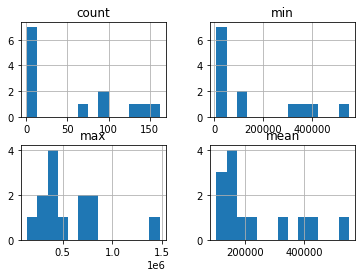

In [104]:
grouped_by_floor.hist(bins=len(grouped_by_floor))

In [96]:
grouped_by_pag = df.groupby(by="Pagasts")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_pag

count     min     max           mean
Pagasts                                                      
-                            1  144000  144000  144000.000000
Allažu pag.Allažmuiža        1   90000   90000   90000.000000
Allažu pag.Egļupe            1   18500   18500   18500.000000
Babītes pag.Babīte           3  140000  500000  330000.000000
Babītes pag.Brīvkalni        1  301000  301000  301000.000000
...                        ...     ...     ...            ...
Ķekavas pag.Odukalns         2  134000  250000  192000.000000
Ķekavas pag.Plakanciems      2   35000   55000   45000.000000
Ķekavas pag.Rāmava           3  215000  300000  253333.333333
Ķekavas pag.Vimbukrogs       1  235000  235000  235000.000000
Ķekavas pag.Ķekava           5   69900  299000  207280.000000

[113 rows x 4 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD3AEB59A0>,
      dtype=object)

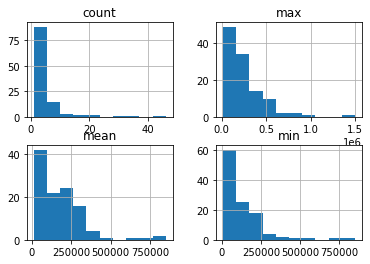

In [100]:
grouped_by_pag.hist()

In [101]:
grouped_by_pag.plot(x="Pagasts", y="mean")

KeyError: 'Pagasts'

In [ ]:
df.to_excel("c:/temp/my_apartments.xlsx") # i could this with absolute path

In [ ]:
from datetime import datetime as dt
now = dt.now()
now.month, now.day, now.hour, now.second

In [ ]:
# url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
url = centrs
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"
save_path

In [ ]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"

df = get_all_ads_df(url, save_path)

In [ ]:
url = "https://www.ss.com/lv/transport/cars/vaz/riga_f/"
df = get_all_ads_df(url, "../data/vaz_18_03.xlsx")

# TODO 
# Try with different starting address not only centrs
## Maybe combine regions
## See how it would work with maybe cars
## Data engineering make new columns based on existing ones, clean some columns
### Changing floors 2/6 to columns 2 and 6, clean up Euro signs
## Sorting, Describing, Grouping by regions etc

In [ ]:
df = pd.read_excel("centrs_10_03.xlsx")
df.head()

In [83]:
df.shape

(630, 11)

In [84]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor    price  
0   90   3/5  P. kara  2,889 €  260,000  €     3        5  260,000  
1  126   5/6  P. kara  2,302 €  290,000  €     5        6  290,000  
2   39   2/6    Jaun.  1,603 €   62,500  €     2        6   62,500  
3   69   1/5  Specpr.  1,348 €   93,000  €     1        5   93,000  
4   54   4/5   Renov.  1,667 €   90,000  €     4        5   90,000

In [85]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor   price  
0   90   3/5  P. kara  2,889 €  260,000  €     3        5  260000  
1  126   5/6  P. kara  2,302 €  290,000  €     5        6  290000  
2   39   2/6    Jaun.  1,603 €   62,500  €     2        6   62500  
3   69   1/5  Specpr.  1,348 €   93,000  €     1        5   93000  
4   54   4/5   Renov.  1,667 €   90,000  €     4        5   90000

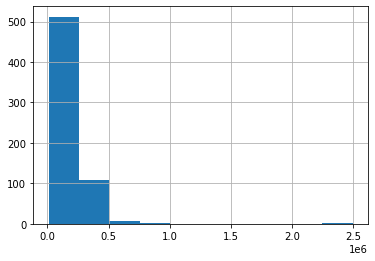

In [86]:
df.price.hist()

In [ ]:
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.info()

In [87]:
#typecasting example
df.Floor = df.Floor.astype('int32')
df.MaxFloor = df.MaxFloor.astype('int32')

In [88]:
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena  Floor  MaxFloor   price  
0   90   3/5  P. kara  2,889 €  260,000  €      3         5  260000  
1  126   5/6  P. kara  2,302 €  290,000  €      5         6  290000  
2   39   2/6    Jaun.  1,603 €   62,500  €      2         6   62500  
3   69   1/5  Specpr.  1,348 €   93,000  €      1         5   93000  
4   54   4/5   Renov.  1,667 €   90,000  €      4         5   90000

In [89]:
d23 = df[df.MaxFloor > 20]
d23

description  \
26  Pārdodas plašs, ekskluzīvs dzīvoklis ar unikāl...   
3   Divistabu dzīvoklis projektā “Skanstes virsotn...   
29  Для ценителей просторного жилья, предлагается ...   
25  Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...   
12  Īpašnieks pārdod siltu, gaišu un plašu dzīvokl...   
20  Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...   
8   Ideālais dzīvoklis Tev un tavai ģimenei. Mūsdi...   
6   Pārdod plašu 4 istabu dzīvokli Skankstes kvart...   

                                                  url          Iela Ist.   m2  \
26  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    3  167   
3   https://ss.com/msg/lv/real-estate/flats/riga/c...   Skanstes 29    2   68   
29  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4  170   
25  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3  109   
12  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4  130   
20  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3  109   
8   https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    4  112   
6   https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    4  112   

    Stāvs Sērija Cena, m2        Cena  Floor  MaxFloor   price  
26  20/22  Jaun.  4,491 €  750,000  €     20        22  750000  
3   12/24  Jaun.  2,147 €  145,999  €     12        24  145999  
29  20/24  Jaun.  4,412 €  750,000  €     20        24  750000  
25  14/24  Jaun.  2,339 €  255,000  €     14        24  255000  
12  15/24  Jaun.  2,692 €  350,000  €     15        24  350000  
20  14/24  Jaun.  2,477 €  270,000  €     14        24  270000  
8   11/23  Jaun.  2,850 €  319,200  €     11        23  319200  
6   11/23  Jaun.  2,850 €  319,200  €     11        23  319200

In [90]:
df.describe().T # T is for transposing rows and columns

count           mean            std     min      25%       50%  \
Floor     630.0       3.446032       2.242694     1.0      2.0       3.0   
MaxFloor  630.0       5.688889       2.505645     1.0      5.0       5.0   
price     630.0  167000.236508  150570.766354  8701.0  78000.0  135000.0   

               75%        max  
Floor          5.0       20.0  
MaxFloor       6.0       24.0  
price     219810.0  2500000.0

In [91]:
df.describe().T.to_csv("center_stats.csv")

In [102]:
import plotly.express as px

In [105]:
fig = px.histogram(df, x="price", nbins=100)
fig.show()

In [94]:
import seaborn as sns # seaborn sits on top of matplotlib with better defaults
import matplotlib.pyplot as plt


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  630 non-null    object
 1   url          630 non-null    object
 2   Iela         630 non-null    object
 3   Ist.         630 non-null    object
 4   m2           630 non-null    object
 5   Stāvs        630 non-null    object
 6   Sērija       630 non-null    object
 7   Cena, m2     630 non-null    object
 8   Cena         630 non-null    object
 9   Floor        630 non-null    int32 
 10  MaxFloor     630 non-null    int32 
 11  price        630 non-null    int32 
dtypes: int32(3), object(9)
memory usage: 56.6+ KB


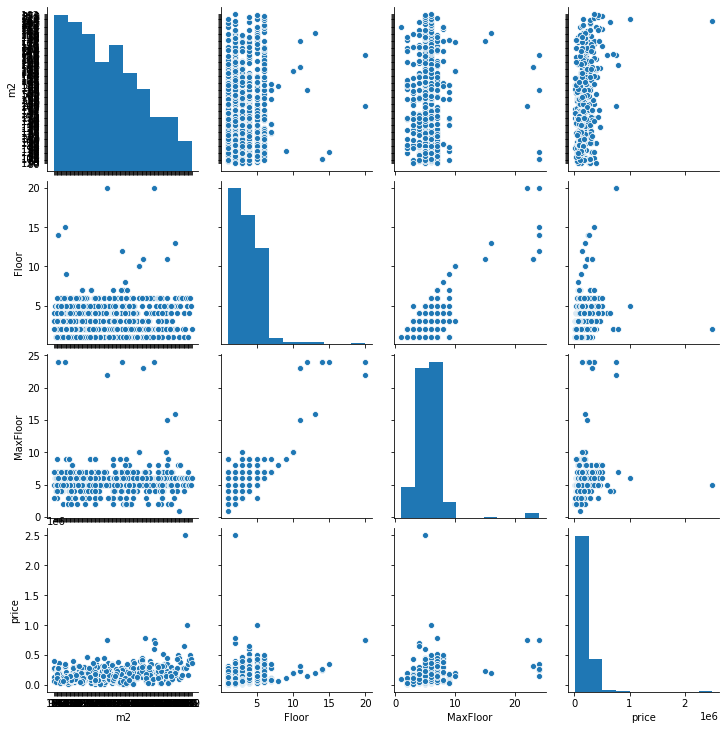

In [96]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
volvo_url = "https://www.ss.com/lv/transport/cars/volvo/sell/"
volvos = get_all_ads_df(volvo_url, "../data/volvo_03_18.xlsx")

In [97]:
volvos = pd.read_excel("volvo_270921.xlsx")
volvos.head()

Unnamed: 0                                        description  \
0           0  Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...   
1           1  Auto labā tehniskā un vizuālā stāvoklī, auto i...   
2           2  Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...   
3           3  Tikko No Vacijas. Facelift Modelis. Mehaniska ...   
4           4  Volvo V70 Facelift, viens no labākajiem un jau...   

                                                 url Modelis  Gads Tilp.  \
0  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2002  2.4D   
1  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2003  2.4D   
2  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2011  2.0D   
3  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2010  2.4D   
4  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2007  2.4D   

     Nobrauk.       Cena  
0  330 tūkst.   2,300  €  
1  390 tūkst.   2,600  €  
2  235 tūkst.  12,490  €  
3           -  11,650  €  
4  300 tūkst.   3,500  €

In [ ]:
volvos.shape

In [ ]:
volvos.head(10)

In [ ]:
gr_auto['Price'] = 

In [98]:
volvos["price"] = volvos.Cena.str.split(' ').str[0]
volvos.price = volvos.price.str.replace(",","").astype('int32')
volvos.head()

Unnamed: 0                                        description  \
0           0  Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...   
1           1  Auto labā tehniskā un vizuālā stāvoklī, auto i...   
2           2  Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...   
3           3  Tikko No Vacijas. Facelift Modelis. Mehaniska ...   
4           4  Volvo V70 Facelift, viens no labākajiem un jau...   

                                                 url Modelis  Gads Tilp.  \
0  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2002  2.4D   
1  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2003  2.4D   
2  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2011  2.0D   
3  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2010  2.4D   
4  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2007  2.4D   

     Nobrauk.       Cena  price  
0  330 tūkst.   2,300  €   2300  
1  390 tūkst.   2,600  €   2600  
2  235 tūkst.  12,490  €  12490  
3           -  11,650  €  11650  
4  300 tūkst.   3,500  €   3500

In [99]:

gr_auto = volvos.groupby(["Gads","Modelis"])["price"].agg(["count", "min", "max", "mean", ])  #.head(n = 10)
gr_auto

count    min    max     mean
Gads Modelis                              
1987 240          1   4700   4700   4700.0
1989 740          1   4499   4499   4499.0
1990 460          1   1500   1500   1500.0
     740          1   3250   3250   3250.0
1992 740          1   1300   1300   1300.0
...             ...    ...    ...      ...
2019 XC 40        3  29900  34590  32560.0
     XC 60        3  28880  37500  33760.0
     XC 90        1  47990  47990  47990.0
2020 S60          1  27900  27900  27900.0
     S90          1  40490  40490  40490.0

[178 rows x 4 columns]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(0).str.contains("2015")] # how to filter multi level index

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")].to_excel("S60.xlsx")

In [ ]:
print(dt.today())

In [ ]:
suzuki_url = "https://www.ss.com/lv/transport/cars/suzuki/"
# sdf = get_all_ads_df(suzuki_url, f"suzuki_{dt.today()}.xlsx")
sdf = get_all_ads_df(suzuki_url, f"suzuki.xlsx")
sdf.head()

In [ ]:
sdf.info()

In [ ]:
sdf["Tilp."] = sdf["Tilp."].str.replace("\w","", regex=True)
sdf.head()

In [ ]:
sdf["Nobrauk."] = sdf["Nobrauk."].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf["Cena"] = sdf["Cena"].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf = sdf.dropna(how="any", axis=0)
sdf

In [ ]:
sdf = sdf[sdf["Nobrauk."].str.len() > 0] # got rid of those empty rows finally
sdf

In [ ]:
sdf["Cena"] = sdf["Cena"].astype("float32")

In [ ]:
gr_auto = sdf.groupby(["Gads","Modelis"])["Cena"].agg(["count","min", "max", "mean"]) 
gr_auto